# Day 8 – Session 2: Experimenting with Interpolation Steps

**Task**: In this hands-on notebook, students experiment with different numbers of interpolation steps and observe the effect on trajectory smoothness. They will plot how the joint angles evolve and compute simple smoothness metrics. Discussion will center on how more steps yield smoother trajectories and how one might interpolate in Cartesian space if the task requires a curved path.

In [ ]:
!pip install matplotlib numpy pybullet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define a 3-joint start and goal configuration
start = np.array([0.0, 1.0, -0.5])
goal  = np.array([1.5, -0.5, 0.5])

In [ ]:
# Reuse the linear interpolation function
def linear_interpolation(start, goal, steps):
    return np.linspace(start, goal, steps)

# Smoothness metric: sum of squared joint differences
def path_smoothness(traj):
    diffs = np.diff(traj, axis=0)
    return np.sum(diffs**2)

In [ ]:
step_counts = [2, 5, 10, 20]
trajectories = []
for n in step_counts:
    traj = linear_interpolation(start, goal, n)
    trajectories.append(traj)
    smooth = path_smoothness(traj)
    print(f"{n} steps: smoothness metric = {smooth:.2f}")

2 steps: smoothness metric = 5.50
5 steps: smoothness metric = 1.38
10 steps: smoothness metric = 0.61
20 steps: smoothness metric = 0.29


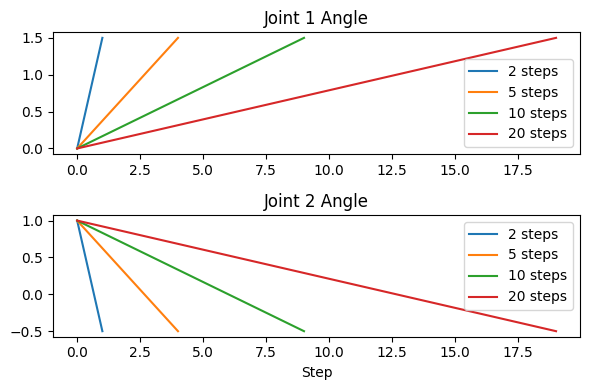

In [ ]:
# Plot Joint 1 and Joint 2 angles for each trajectory
fig, axs = plt.subplots(2, 1, figsize=(6,4))
for i, n in enumerate(step_counts):
    traj = trajectories[i]
    axs[0].plot(np.arange(traj.shape[0]), traj[:,0], label=f'{n} steps')
    axs[1].plot(np.arange(traj.shape[0]), traj[:,1], label=f'{n} steps')
axs[0].set_title('Joint 1 Angle')
axs[1].set_title('Joint 2 Angle')
axs[1].set_xlabel('Step')
axs[0].legend(); axs[1].legend()
plt.tight_layout()
plt.show()

**🎯 Exercises**

1. Smoothness Metric:
   - Implement `max_joint_speed = max(|Δθ|) / Δt` and compute it for 3, 6, 12, 24 steps.  
   - Plot max speed vs. number of steps.  

2. Non‑Linear Path Idea:
   - Replace `linear_interpolation` with a cosine “ease‑in‑out” (already shown).  
   - Compare smoothness metrics; which path has lower maximum speed?  

3. Advanced Challenge:
   - Write a function to interpolate **Cartesian points** on a straight line, then solve IK for each point to produce joint‑angle waypoints.


In [ ]:
# Analyze total joint changes for each trajectory
for i, n in enumerate(step_counts):
    traj = trajectories[i]
    total_change = np.sum(np.abs(np.diff(traj, axis=0)))
    print(f"{n} steps: total joint change = {total_change:.2f} rad")

2 steps: total joint change = 4.00 rad
5 steps: total joint change = 4.00 rad
10 steps: total joint change = 4.00 rad
20 steps: total joint change = 4.00 rad


In [ ]:
# (Simulation) Apply each trajectory to the robot's first 2 joints
import pybullet as p, pybullet_data
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
kukaId = p.loadURDF("kuka_iiwa/model.urdf", useFixedBase=True)
for n in step_counts:
    traj = linear_interpolation(start, goal, n)
    for angles in traj:
        for j in range(2):
            p.resetJointState(kukaId, j, angles[j])
        p.stepSimulation()
    print(f"Simulated {n}-step trajectory.")
p.disconnect()

Simulated 2-step trajectory.
Simulated 5-step trajectory.
Simulated 10-step trajectory.
Simulated 20-step trajectory.


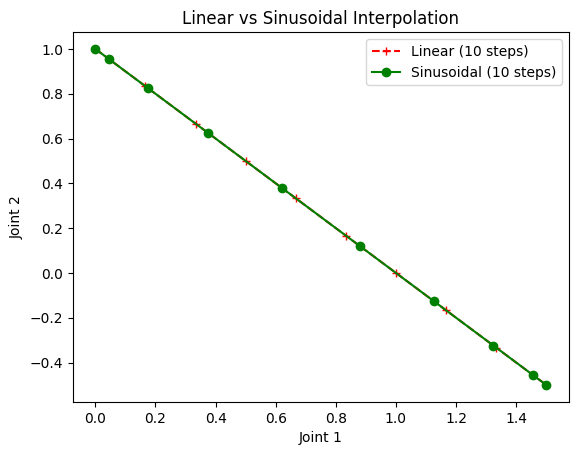

Linear smoothness: 0.6111111111111112
Sinusoidal smoothness: 0.7463038177743836


In [ ]:
# Compare linear to sinusoidal interpolation for 10 steps
from math import cos, pi
steps = 10
traj_sin = []
for i in range(steps):
    t = i/(steps-1)
    alpha = (1 - cos(pi*t)) / 2
    traj_sin.append(start + (goal - start) * alpha)
traj_sin = np.array(traj_sin)
traj_lin10 = linear_interpolation(start, goal, 10)
plt.plot(traj_lin10[:,0], traj_lin10[:,1], 'r--+', label='Linear (10 steps)')
plt.plot(traj_sin[:,0], traj_sin[:,1], 'g-o', label='Sinusoidal (10 steps)')
plt.xlabel('Joint 1')
plt.ylabel('Joint 2')
plt.legend()
plt.title('Linear vs Sinusoidal Interpolation')
plt.show()

print("Linear smoothness:", path_smoothness(traj_lin10))
print("Sinusoidal smoothness:", path_smoothness(traj_sin))

In [ ]:
# 2-joint example for variation
start_angles = np.array([0.0, 0.5])
goal_angles  = np.array([1.0, -1.0])
traj = linear_interpolation(start_angles, goal_angles, 5)
print("2-joint trajectory (5 steps):")
print(traj)

2-joint trajectory (5 steps):
[[ 0.     0.5  ]
 [ 0.25   0.125]
 [ 0.5   -0.25 ]
 [ 0.75  -0.625]
 [ 1.    -1.   ]]


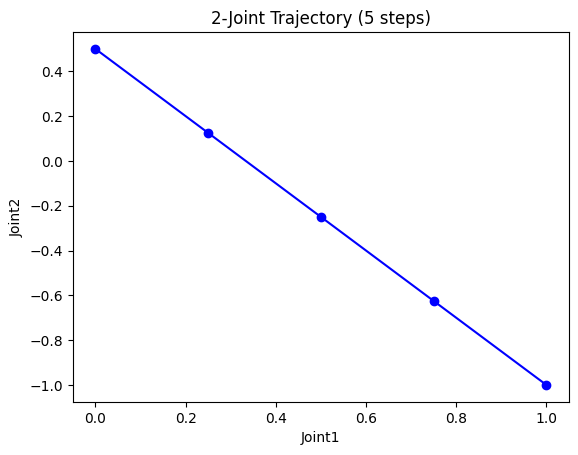

In [ ]:
plt.plot(traj[:,0], traj[:,1], 'b-o')
plt.xlabel('Joint1')
plt.ylabel('Joint2')
plt.title('2-Joint Trajectory (5 steps)')
plt.show()

In [ ]:
# Effect of step count on a 2-joint trajectory
for steps in [3, 6, 9]:
    t = linear_interpolation(start_angles, goal_angles, steps)
    print(f"{steps} steps -> Endpoints: {t[0]} to {t[-1]}")

3 steps -> Endpoints: [0.  0.5] to [ 1. -1.]
6 steps -> Endpoints: [0.  0.5] to [ 1. -1.]
9 steps -> Endpoints: [0.  0.5] to [ 1. -1.]


In [ ]:
# 4-joint example
start4 = np.zeros(4)
goal4 = np.array([1, 0.5, -0.2, 1.2])
traj4 = linear_interpolation(start4, goal4, 8)
print("4-joint interpolation (8 steps):\n", traj4)

4-joint interpolation (8 steps):
 [[ 0.          0.          0.          0.        ]
 [ 0.14285714  0.07142857 -0.02857143  0.17142857]
 [ 0.28571429  0.14285714 -0.05714286  0.34285714]
 [ 0.42857143  0.21428571 -0.08571429  0.51428571]
 [ 0.57142857  0.28571429 -0.11428571  0.68571429]
 [ 0.71428571  0.35714286 -0.14285714  0.85714286]
 [ 0.85714286  0.42857143 -0.17142857  1.02857143]
 [ 1.          0.5        -0.2         1.2       ]]


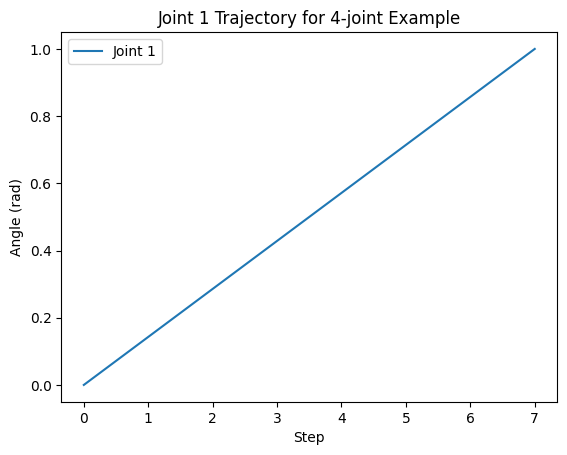

In [ ]:
# Plot Joint 1 of the 4-joint example
plt.plot(traj4[:,0], label='Joint 1')
plt.xlabel('Step')
plt.ylabel('Angle (rad)')
plt.title('Joint 1 Trajectory for 4-joint Example')
plt.legend()
plt.show()